In [2]:
!pip install matplotlib
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
!pip install pingouin
!pip install mlxtend

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pingouin as pg
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, style='white')
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용할 한글 폰트 경로를 지정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 1. 데이터 확인

In [3]:
data = pd.read_excel('C:/Users/user/BigContest/상권지수테이블(군집분석용).xlsx')
data

,상권명,자치구,행정동,밀집도,평균 보증금,총 가구수,총 상주인구수,총 생활인구수,총 직장인구수,교통시설 수,...,학교 수,대학교 수,쇼핑 시설 수,숙박 시설 수,업종 다양성,평균 신규 고객 증감률,평균 고객 증감률,20대 구매력,30대 구매력,40대 구매력
0,종로3가역,종로구,종로1.2.3.4가동,1.199037,0.088210,3117,3708,2012662,8495.000009,11.0,...,1.0,0.0,0.0,5.0,0.722222,-0.217353,-0.214412,8413.862865,11061.31255,14010.37285
1,종각역,종로구,종로1.2.3.4가동,0.188006,0.061798,356,431,1415457,33181.000000,14.0,...,0.0,0.0,0.0,8.0,0.000000,0.984286,1.779048,11791.758420,17010.99072,26434.61586
2,인사동,종로구,종로1.2.3.4가동,1.291604,0.044023,308,397,360458,22070.000000,15.0,...,0.0,0.0,0.0,1.0,0.000000,-0.499554,-0.428125,38333.339710,47894.52568,66309.77393
3,문래예술촌(문래창작촌),영등포구,문래동,2.579993,0.041563,752,1255,1058780,4220.999989,10.0,...,0.0,0.0,0.0,1.0,0.466667,-1.091667,-1.174333,11212.046640,18755.26259,28569.78944
4,구로역,구로구,구로제2동,0.503686,0.050742,1133,2166,514341,9291.000008,20.0,...,1.0,0.0,9.0,1.0,0.000000,-0.010556,-0.001667,15785.674030,23275.75103,26922.19052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,방학동도깨비시장,도봉구,방학제2동,0.458836,0.037041,599,1244,269748,59.999998,3.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,20266.342700,19917.92538,28958.24675
109,가산디지털단지,금천구,가산동,0.319475,0.039934,3492,3865,1126773,81099.999990,85.0,...,0.0,0.0,0.0,3.0,0.634146,-0.218421,-0.310083,19865.104570,21670.93142,22460.11672
110,장지역(가든파이브),송파구,문정2동,0.202858,0.033154,89,167,248895,4621.999985,10.0,...,0.0,0.0,0.0,0.0,0.000000,0.009444,0.013333,36613.309940,49342.06134,47425.89886
111,문정역,송파구,문정2동,4.906552,0.053401,3460,4454,467687,906.999999,1.0,...,0.0,0.0,0.0,0.0,0.659483,-0.155000,-0.215649,23572.776730,29707.70990,31410.39207


In [4]:
list(data.columns)

['상권명',
 '자치구',
 '행정동',
 '밀집도',
 '평균 보증금',
 '총 가구수',
 '총 상주인구수',
 '총 생활인구수',
 '총 직장인구수',
 '교통시설 수',
 '평균 교통 지출 총금액',
 '공공 시설 수',
 '의료 시설 수',
 '학교 수',
 '대학교 수',
 '쇼핑 시설 수',
 '숙박 시설 수',
 '업종 다양성',
 '평균 신규 고객 증감률',
 '평균 고객 증감률',
 '20대 구매력',
 '30대 구매력',
 '40대 구매력']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   상권명           113 non-null    object 
 1   자치구           113 non-null    object 
 2   행정동           113 non-null    object 
 3   밀집도           113 non-null    float64
 4   평균 보증금        113 non-null    float64
 5   총 가구수         113 non-null    int64  
 6   총 상주인구수       113 non-null    int64  
 7   총 생활인구수       113 non-null    int64  
 8   총 직장인구수       113 non-null    float64
 9   교통시설 수        113 non-null    float64
 10  평균 교통 지출 총금액  109 non-null    float64
 11  공공 시설 수       113 non-null    float64
 12  의료 시설 수       113 non-null    float64
 13  학교 수          113 non-null    float64
 14  대학교 수         113 non-null    float64
 15  쇼핑 시설 수       113 non-null    float64
 16  숙박 시설 수       113 non-null    float64
 17  업종 다양성        113 non-null    float64
 18  평균 신규 고객 증감률  113 non-null    

### 2. 결측치 처리, 새 변수 생성

In [6]:
data.isna().sum()

상권명             0
자치구             0
행정동             0
밀집도             0
평균 보증금          0
총 가구수           0
총 상주인구수         0
총 생활인구수         0
총 직장인구수         0
교통시설 수          0
평균 교통 지출 총금액    4
공공 시설 수         0
의료 시설 수         0
학교 수            0
대학교 수           0
쇼핑 시설 수         0
숙박 시설 수         0
업종 다양성          0
평균 신규 고객 증감률    0
평균 고객 증감률       0
20대 구매력         0
30대 구매력         0
40대 구매력         0
dtype: int64

In [7]:
median = data['평균 교통 지출 총금액'].median()
data['평균 교통 지출 총금액'].fillna(median,inplace=True)
data.isna().sum()

상권명             0
자치구             0
행정동             0
밀집도             0
평균 보증금          0
총 가구수           0
총 상주인구수         0
총 생활인구수         0
총 직장인구수         0
교통시설 수          0
평균 교통 지출 총금액    0
공공 시설 수         0
의료 시설 수         0
학교 수            0
대학교 수           0
쇼핑 시설 수         0
숙박 시설 수         0
업종 다양성          0
평균 신규 고객 증감률    0
평균 고객 증감률       0
20대 구매력         0
30대 구매력         0
40대 구매력         0
dtype: int64

### 3. 변수 스케일링

In [8]:
scaler = MinMaxScaler()
data_pca = data.copy()

cols = ['밀집도',
        '평균 보증금',
        '총 가구수',
        '총 상주인구수',
        '총 생활인구수',
        '총 직장인구수',
        '교통시설 수',
        '평균 교통 지출 총금액',
        '공공 시설 수',
        '의료 시설 수',
        '학교 수',
        '대학교 수',
        '쇼핑 시설 수',
        '숙박 시설 수',
        '업종 다양성',
        '평균 신규 고객 증감률',
        '평균 고객 증감률',
        '20대 구매력',
        '30대 구매력',
        '40대 구매력']

data_pca[cols] = scaler.fit_transform(data_pca[cols])

data_pca

,상권명,자치구,행정동,밀집도,평균 보증금,총 가구수,총 상주인구수,총 생활인구수,총 직장인구수,교통시설 수,...,학교 수,대학교 수,쇼핑 시설 수,숙박 시설 수,업종 다양성,평균 신규 고객 증감률,평균 고객 증감률,20대 구매력,30대 구매력,40대 구매력
0,종로3가역,종로구,종로1.2.3.4가동,0.207223,0.832154,0.349349,0.290045,0.297690,0.104747,0.129412,...,1.0,0.00,0.0,0.454545,0.886863,0.438613,0.617068,0.002331,0.001633,0.000000
1,종각역,종로구,종로1.2.3.4가동,0.029836,0.572186,0.039403,0.033367,0.205441,0.409137,0.164706,...,0.0,0.00,0.0,0.727273,0.000000,0.935598,0.968780,0.046637,0.061223,0.051669
2,인사동,종로구,종로1.2.3.4가동,0.223464,0.397229,0.034014,0.030704,0.042479,0.272133,0.176471,...,0.0,0.00,0.0,0.090909,0.000000,0.321898,0.579362,0.394770,0.370544,0.217500
3,문래예술촌(문래창작촌),영등포구,문래동,0.449514,0.373012,0.083857,0.097909,0.150347,0.052047,0.117647,...,0.0,0.00,0.0,0.090909,0.573050,0.077006,0.447706,0.039034,0.078693,0.060549
4,구로역,구로구,구로제2동,0.085222,0.463359,0.126628,0.169265,0.066249,0.114562,0.235294,...,1.0,0.00,1.0,0.090909,0.000000,0.524142,0.654603,0.099024,0.123969,0.053697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,방학동도깨비시장,도봉구,방학제2동,0.077353,0.328511,0.066682,0.097047,0.028468,0.000740,0.035294,...,0.0,0.00,0.0,0.000000,0.000000,0.528508,0.654897,0.157794,0.090338,0.062164
109,가산디지털단지,금천구,가산동,0.052902,0.356985,0.391446,0.302342,0.160849,1.000000,1.000000,...,0.0,0.00,0.0,0.272727,0.778709,0.438172,0.600188,0.152531,0.107896,0.035140
110,장지역(가든파이브),송파구,문정2동,0.032442,0.290248,0.009430,0.012689,0.025247,0.056991,0.117647,...,0.0,0.00,0.0,0.000000,0.000000,0.532414,0.657250,0.372209,0.385042,0.138967
111,문정역,송파구,문정2동,0.857713,0.489531,0.387854,0.348477,0.059043,0.011184,0.011765,...,0.0,0.00,0.0,0.000000,0.809821,0.464402,0.616849,0.201163,0.188390,0.072362


### 4. 변별력있는 변수 찾기(PCA)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


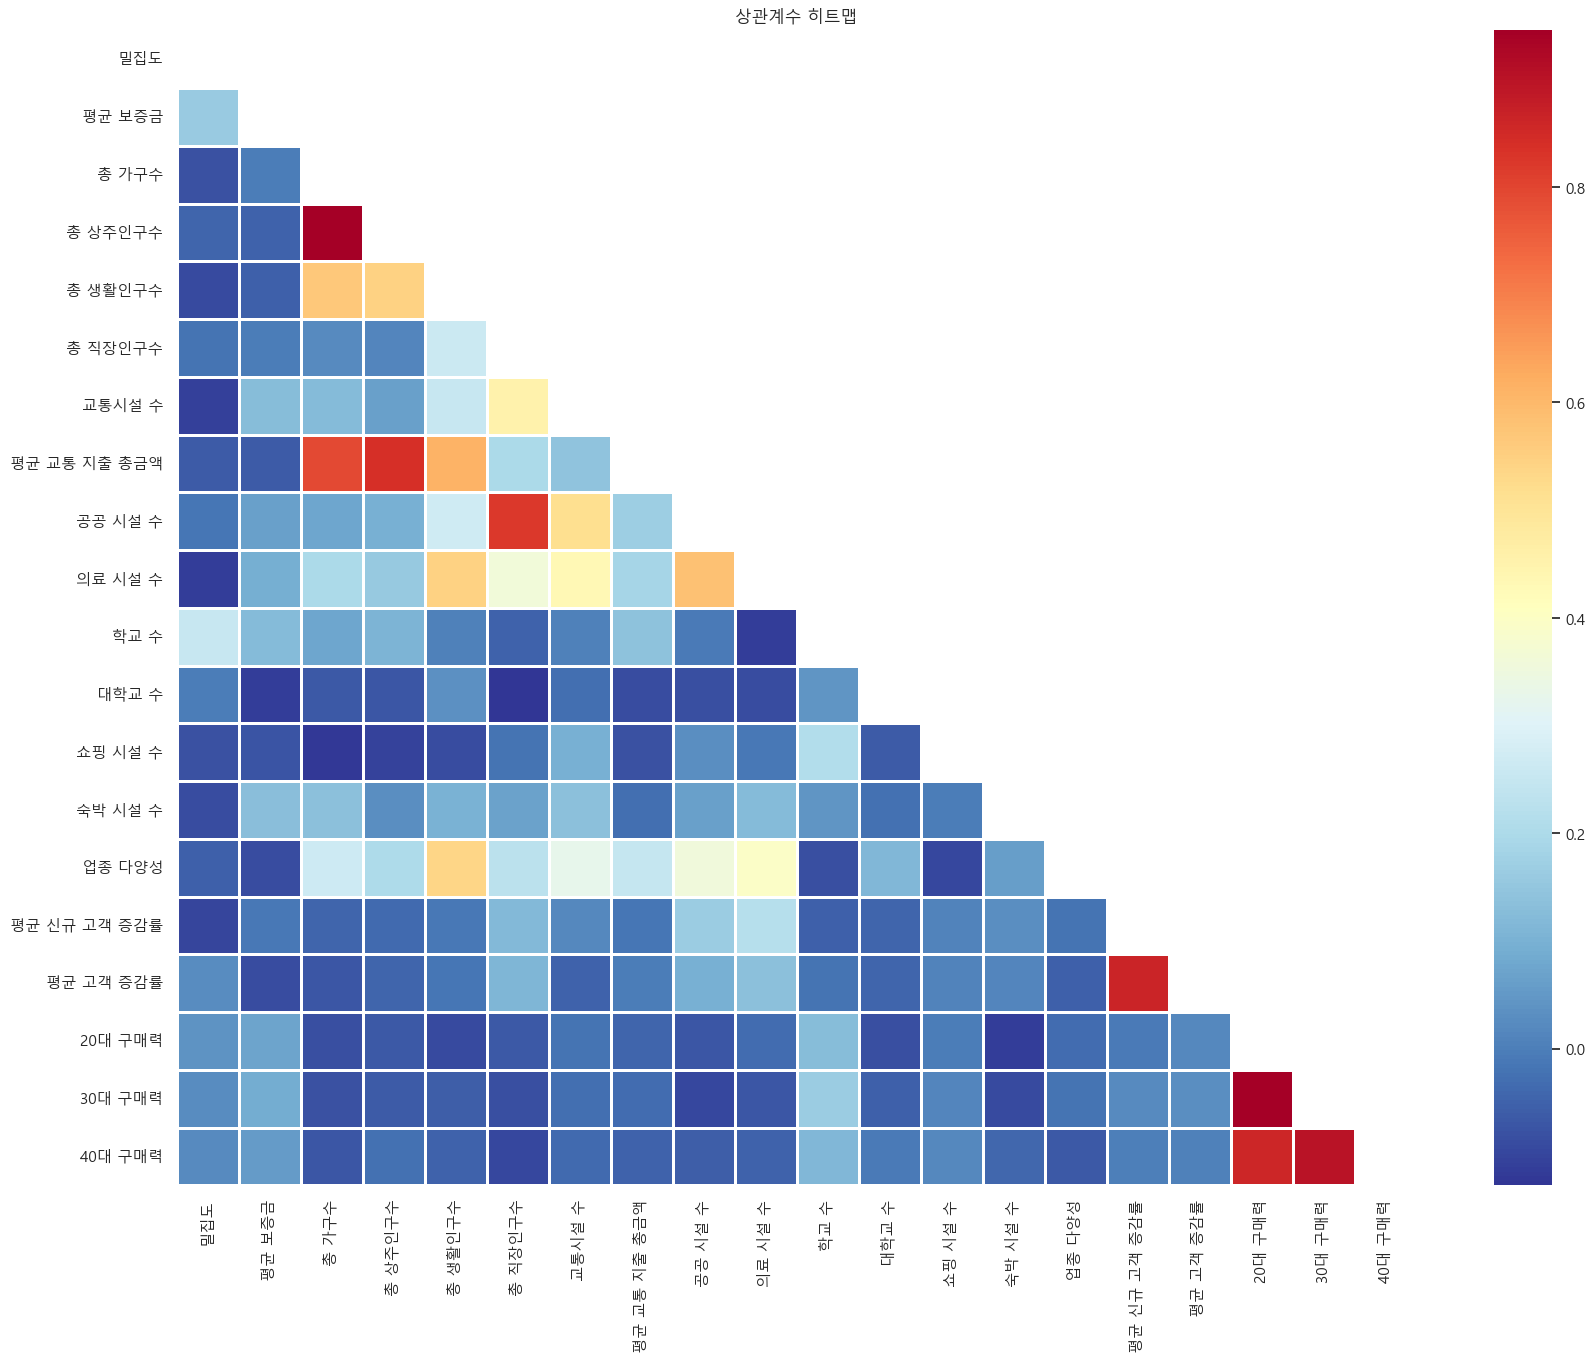

In [9]:
%matplotlib inline
# 변수 간의 상관성 파악
corr = data_pca[cols].corr()

plt.figure(figsize=(20,15))

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr,
            annot=True,
            mask=mask,
            fmt = '%.2f',
            linewidths=1.,
            cmap='RdYlBu_r',
            annot_kws={"size": 12})

plt.title('상관계수 히트맵')
plt.show()

In [10]:
corr

,밀집도,평균 보증금,총 가구수,총 상주인구수,총 생활인구수,총 직장인구수,교통시설 수,평균 교통 지출 총금액,공공 시설 수,의료 시설 수,학교 수,대학교 수,쇼핑 시설 수,숙박 시설 수,업종 다양성,평균 신규 고객 증감률,평균 고객 증감률,20대 구매력,30대 구매력,40대 구매력
밀집도,1.000000,0.159118,-0.077506,-0.046063,-0.090026,-0.019294,-0.107946,-0.060147,-0.016118,-0.111727,0.252527,-0.005044,-0.077510,-0.088768,-0.052297,-0.099357,0.024304,0.039166,0.027191,0.019965
평균 보증금,0.159118,1.000000,-0.005093,-0.050538,-0.054220,-0.005443,0.127306,-0.064159,0.062994,0.092741,0.122724,-0.110914,-0.072672,0.129792,-0.087867,-0.010258,-0.086095,0.073414,0.089845,0.055782
총 가구수,-0.077506,-0.005093,1.000000,0.942470,0.564278,0.020030,0.120579,0.791691,0.077322,0.196894,0.075255,-0.064625,-0.119584,0.135965,0.264501,-0.046109,-0.068556,-0.081709,-0.080411,-0.071464
총 상주인구수,-0.046063,-0.050538,0.942470,1.000000,0.545152,0.011678,0.065329,0.839225,0.095398,0.154364,0.105332,-0.072288,-0.106021,0.032068,0.201801,-0.035730,-0.043999,-0.064588,-0.060960,-0.024317
총 생활인구수,-0.090026,-0.054220,0.564278,0.545152,1.000000,0.261904,0.252098,0.614385,0.268295,0.547311,0.005632,0.036041,-0.088145,0.102637,0.535988,-0.012812,-0.016824,-0.091470,-0.060015,-0.051466
총 직장인구수,-0.019294,-0.005443,0.020030,0.011678,0.261904,1.000000,0.452698,0.197397,0.820916,0.359263,-0.049120,-0.127110,-0.018660,0.067382,0.228491,0.115987,0.108850,-0.066966,-0.081790,-0.093667
교통시설 수,-0.107946,0.127306,0.120579,0.065329,0.252098,0.452698,1.000000,0.142029,0.516191,0.433349,0.005588,-0.027489,0.095933,0.135247,0.328704,0.017222,-0.051475,-0.021084,-0.030112,-0.036963
평균 교통 지출 총금액,-0.060147,-0.064159,0.791691,0.839225,0.614385,0.197397,0.142029,1.000000,0.167068,0.185118,0.139448,-0.089262,-0.076921,-0.027452,0.248604,-0.018003,-0.001437,-0.045536,-0.033245,-0.050113
공공 시설 수,-0.016118,0.062994,0.077322,0.095398,0.268295,0.820916,0.516191,0.167068,1.000000,0.582686,-0.009613,-0.083904,0.028194,0.061908,0.354986,0.164887,0.097421,-0.069911,-0.095492,-0.057831
의료 시설 수,-0.111727,0.092741,0.196894,0.154364,0.547311,0.359263,0.433349,0.185118,0.582686,1.000000,-0.110767,-0.087760,-0.012810,0.122862,0.396580,0.216669,0.133802,-0.031848,-0.072081,-0.048322


* 변수 간 상관계수 확인 결과 <br>
    0.94: 총상주인구수-총가구수<br>
    0.84: 평균교통지출총금액-총상주인구수<br>
    0.82: 공공시설수-총직장인구수<br>
    0.79: 평균교통지출총금액-총가구수<br>
    203040대 구매력 간의 강한 상관성

    -> 총 가구수, 평균교통지출총금액, 상주인구수, nn대 구매력 제거 

In [11]:
data['주요고객 구매력'] = data[['20대 구매력', '30대 구매력', '40대 구매력']].mean(axis=1)
data_pca = data.copy()

adj_cols = ['밀집도',
        '평균 보증금',
        '총 생활인구수',
        '총 직장인구수',
        '교통시설 수',
        '공공 시설 수',
        '의료 시설 수',
        '학교 수',
        '대학교 수',
        '쇼핑 시설 수',
        '숙박 시설 수',
        '업종 다양성',
        '평균 신규 고객 증감률',
        '평균 고객 증감률',
        '주요고객 구매력']

data_pca[adj_cols] = scaler.fit_transform(data_pca[adj_cols])

data_pca

data_pca.head(3)

,상권명,자치구,행정동,밀집도,평균 보증금,총 가구수,총 상주인구수,총 생활인구수,총 직장인구수,교통시설 수,...,대학교 수,쇼핑 시설 수,숙박 시설 수,업종 다양성,평균 신규 고객 증감률,평균 고객 증감률,20대 구매력,30대 구매력,40대 구매력,주요고객 구매력
0,종로3가역,종로구,종로1.2.3.4가동,0.207223,0.832154,3117,3708,0.297690,0.104747,0.129412,...,0.0,0.0,0.454545,0.886863,0.438613,0.617068,8413.862865,11061.31255,14010.37285,0.000000
1,종각역,종로구,종로1.2.3.4가동,0.029836,0.572186,356,431,0.205441,0.409137,0.164706,...,0.0,0.0,0.727273,0.000000,0.935598,0.968780,11791.758420,17010.99072,26434.61586,0.052263
2,인사동,종로구,종로1.2.3.4가동,0.223464,0.397229,308,397,0.042479,0.272133,0.176471,...,0.0,0.0,0.090909,0.000000,0.321898,0.579362,38333.339710,47894.52568,66309.77393,0.286046


In [12]:
# PCA 주성분 분석을 통한 차원 축소 진행
pca = PCA(n_components=10)
pca.fit(data_pca[adj_cols])
df_pca = pca.transform(data_pca[adj_cols])

print('원본 데이터 형태: ', str(data_pca.shape))
print('축소된 데이터 형태:', str(df_pca.shape))

원본 데이터 형태:  (113, 24)
축소된 데이터 형태: (113, 10)


In [13]:
print('PCA 주성분 형태: ', pca.components_.shape)
print('PCA 주성분: ', pca.components_)

PCA 주성분 형태:  (10, 15)
PCA 주성분:  [[-0.04399612 -0.03047526  0.28773496  0.203442    0.12254013  0.21060279
   0.22349666 -0.14174382  0.02395079 -0.03070532  0.03395084  0.86016884
   0.01464445 -0.00215052 -0.0276628 ]
 [ 0.15991035  0.07469126  0.07945723  0.01895216  0.0355793   0.04863661
  -0.00485177  0.96426933  0.0294212   0.07405868  0.03337779  0.12597135
  -0.04093138 -0.01811113  0.05805542]
 [-0.02395639  0.09679344  0.04581351  0.62465553  0.18188786  0.47795624
   0.28571382  0.01446555 -0.16238266  0.03839171  0.07399116 -0.37727651
   0.23195207  0.15459562 -0.03226184]
 [ 0.1758057   0.15880747 -0.04323569  0.26254356  0.10552202  0.1375693
  -0.11745276 -0.08030917 -0.05633036 -0.03776945 -0.02242225 -0.05365136
  -0.73150915 -0.52692993 -0.04502803]
 [-0.40484576  0.23349445  0.49469642 -0.25926195  0.07446725 -0.15522612
   0.34452333  0.02207772 -0.07990498  0.02314669  0.48706119 -0.19025259
  -0.13153541 -0.1498105  -0.02692026]
 [ 0.56486908  0.68193126 -0.10809

In [14]:
# 각 주성분의 원본 데이터에 대한 설명력 확인
print('각 주성분의 분산 비율: ', pca.explained_variance_ratio_)

각 주성분의 분산 비율:  [0.32561204 0.18284638 0.11487991 0.06305485 0.05372118 0.04973681
 0.04278905 0.03755543 0.03375452 0.02803302]


In [15]:
num_components = range(1, len(data_pca[adj_cols].columns) + 1)
cumulative_variance = []
for n in num_components:
    pca = PCA(n_components=n)
    pca.fit(data_pca[adj_cols])
    cumulative_variance.append(np.sum(pca.explained_variance_ratio_))

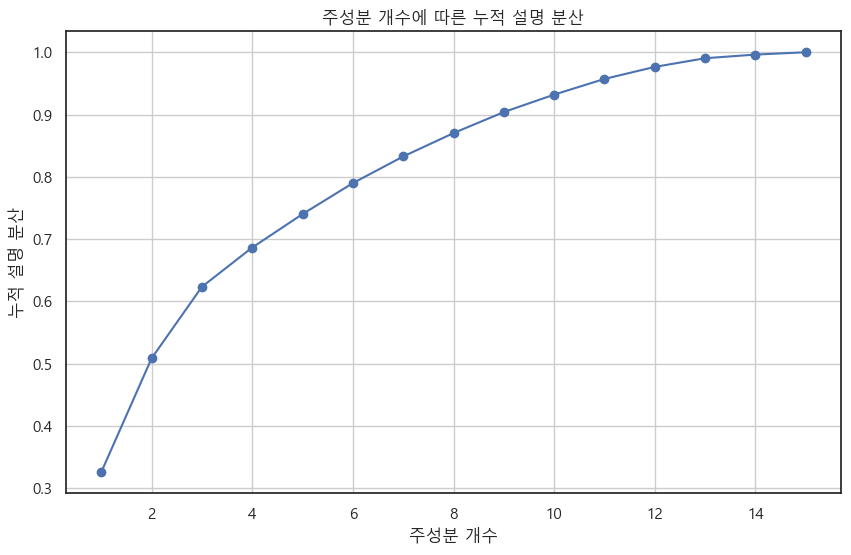

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(num_components, cumulative_variance, marker='o', linestyle='-')
plt.title('주성분 개수에 따른 누적 설명 분산')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명 분산')
plt.grid(True)
plt.show()

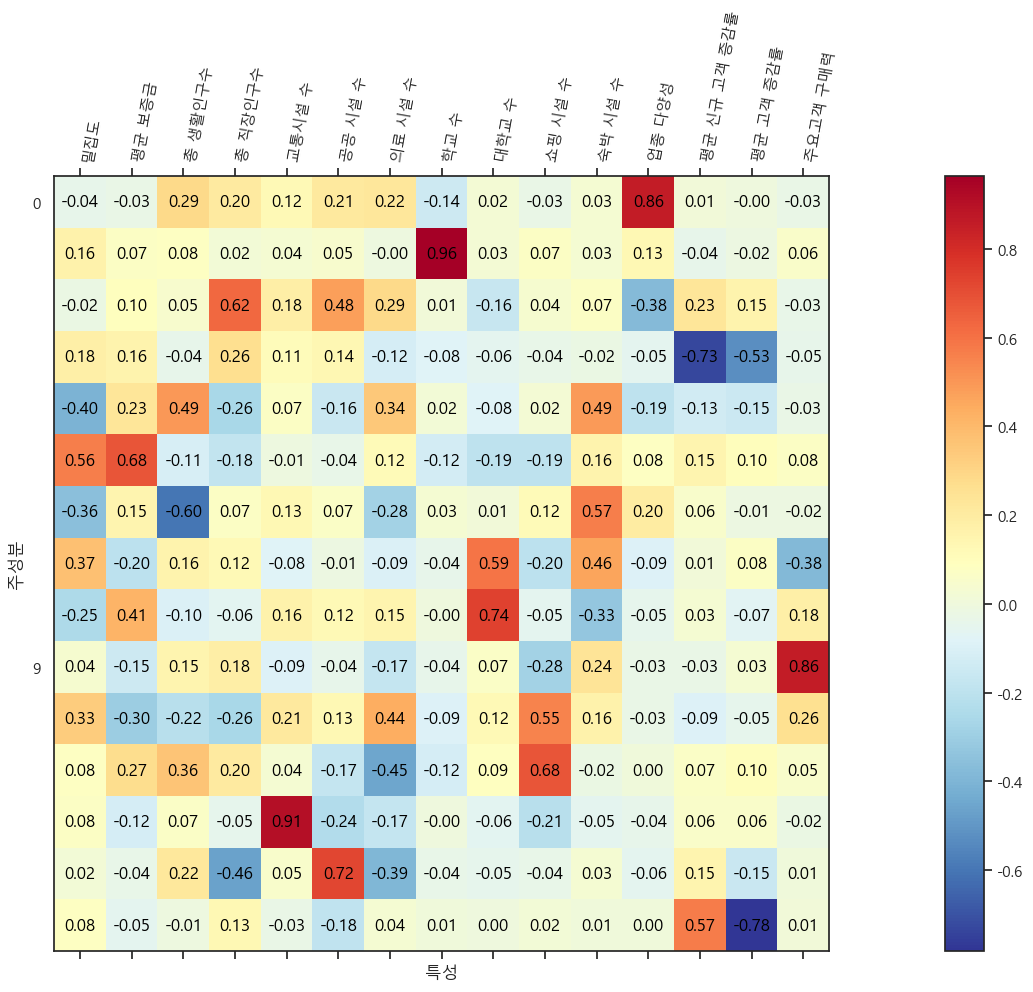

In [17]:
plt.figure(figsize=(30,10))
plt.matshow(pca.components_, cmap='RdYlBu_r', fignum=1)

plt.yticks([0,9])
plt.colorbar()

plt.xticks(range(len(data_pca[adj_cols].columns)), data_pca[adj_cols].columns, rotation=80, ha='left')

plt.xlabel('특성')
plt.ylabel('주성분')

for i in range(len(pca.components_)):
    for j in range(len(data_pca[adj_cols].columns)):
        text = f'{pca.components_[i, j]:.2f}'
        plt.text(j, i, text, va='center', ha='center', color='black')
# 주성분 10개까지 '교통시설 수', '의료시설 수', '쇼핑시설 수'는 큰 상관성을 보이지 않음. 차원 축소 진행

### 5. K-means Clustering

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.14 s
Wall time: 390 ms
n_cluster : 1, inertia : 56.02875569499846


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.12 s
Wall time: 317 ms
n_cluster : 2, inertia : 39.25104843460301


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.28 s
Wall time: 320 ms
n_cluster : 3, inertia : 30.09425726553735


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.2 s
Wall time: 320 ms
n_cluster : 4, inertia : 28.508610960523114


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.28 s
Wall time: 320 ms
n_cluster : 5, inertia : 23.241149281278645


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.62 s
Wall time: 319 ms
n_cluster : 6, inertia : 21.867633340437628


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.08 s
Wall time: 322 ms
n_cluster : 7, inertia : 20.22380472671706


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.03 s
Wall time: 322 ms
n_cluster : 8, inertia : 18.44420956946425


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.47 s
Wall time: 324 ms
n_cluster : 9, inertia : 17.187116429209652


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.48 s
Wall time: 325 ms
n_cluster : 10, inertia : 16.651213401346077


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.36 s
Wall time: 342 ms
n_cluster : 11, inertia : 16.323923466352692


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.38 s
Wall time: 327 ms
n_cluster : 12, inertia : 15.446844747521299


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.42 s
Wall time: 332 ms
n_cluster : 13, inertia : 14.41768441993565


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.11 s
Wall time: 334 ms
n_cluster : 14, inertia : 13.618574442748729


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.09 s
Wall time: 333 ms
n_cluster : 15, inertia : 12.715246294393037


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.28 s
Wall time: 342 ms
n_cluster : 16, inertia : 12.412435948713188


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.19 s
Wall time: 333 ms
n_cluster : 17, inertia : 12.129196079362941


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.38 s
Wall time: 324 ms
n_cluster : 18, inertia : 11.269288592986962


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


CPU times: total: 1.27 s
Wall time: 332 ms
n_cluster : 19, inertia : 10.243192790975394


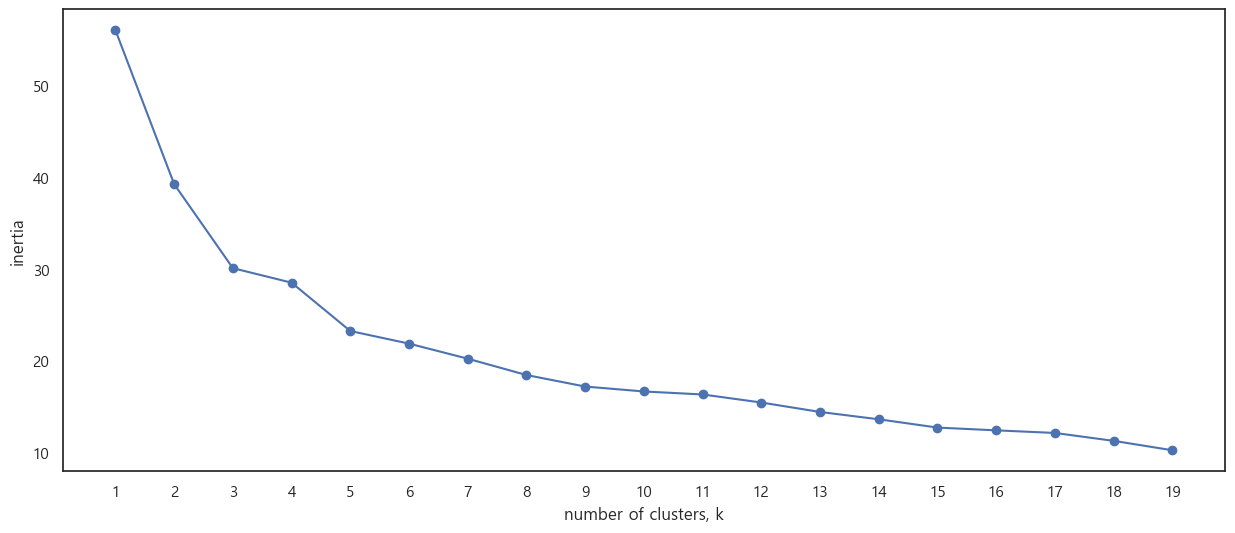

In [18]:
ks = range(1, 20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, n_init=5)
    %time model.fit(df_pca)
    inertias.append(model.inertia_)
    print('n_cluster : {}, inertia : {}'.format(k, model.inertia_))
    
plt.figure(figsize=(15, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [19]:
# 실루엣 계수 검증
silhouette_scores = []
k_range = range(2, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_pca, labels)
    silhouette_scores.append(silhouette_avg)

optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [20]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_pca)

silhouette_avg = silhouette_score(df_pca, kmeans.labels_)

# 결과를 출력합니다.
print(f'optimal_k = {optimal_k} 일 때의 실루엣 계수: {silhouette_avg:.2f}')

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


optimal_k = 5 일 때의 실루엣 계수: 0.36


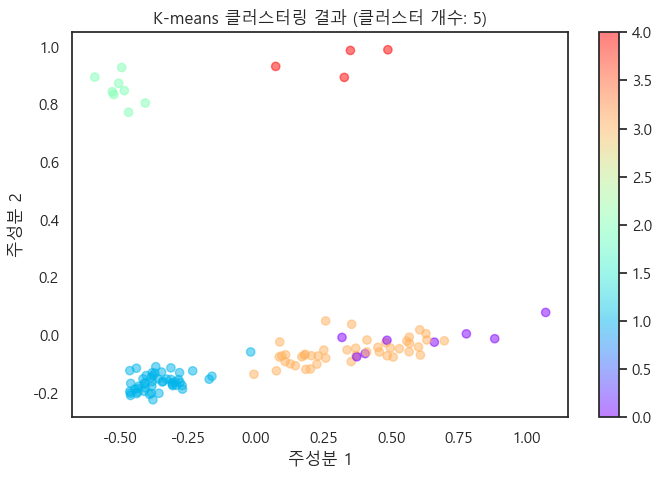

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, 
            cmap='rainbow', marker='o', alpha=0.5)
plt.title(f'K-means 클러스터링 결과 (클러스터 개수: {optimal_k})')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.colorbar()
plt.show()

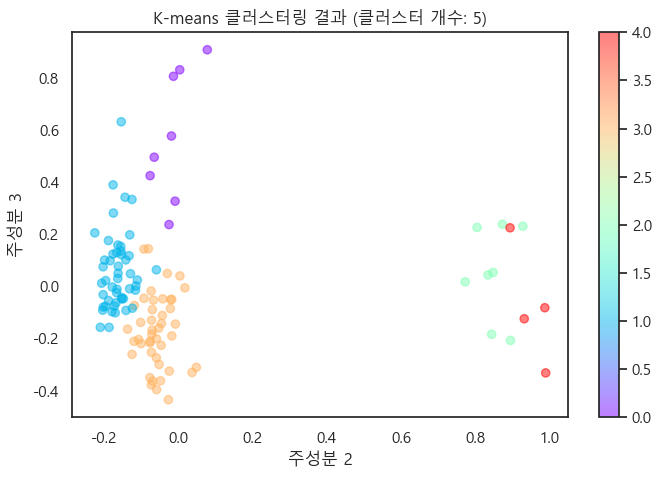

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(df_pca[:, 1], df_pca[:, 2], c=kmeans.labels_, 
            cmap='rainbow', marker='o', alpha=0.5)
plt.title(f'K-means 클러스터링 결과 (클러스터 개수: {optimal_k})')
plt.xlabel('주성분 2')
plt.ylabel('주성분 3')
plt.colorbar()
plt.show()

In [23]:
data['cluster'] = kmeans.labels_ + 1
data.head()

,상권명,자치구,행정동,밀집도,평균 보증금,총 가구수,총 상주인구수,총 생활인구수,총 직장인구수,교통시설 수,...,쇼핑 시설 수,숙박 시설 수,업종 다양성,평균 신규 고객 증감률,평균 고객 증감률,20대 구매력,30대 구매력,40대 구매력,주요고객 구매력,cluster
0,종로3가역,종로구,종로1.2.3.4가동,1.199037,0.088210,3117,3708,2012662,8495.000009,11.0,...,0.0,5.0,0.722222,-0.217353,-0.214412,8413.862865,11061.31255,14010.37285,11161.849422,5
1,종각역,종로구,종로1.2.3.4가동,0.188006,0.061798,356,431,1415457,33181.000000,14.0,...,0.0,8.0,0.000000,0.984286,1.779048,11791.758420,17010.99072,26434.61586,18412.455000,2
2,인사동,종로구,종로1.2.3.4가동,1.291604,0.044023,308,397,360458,22070.000000,15.0,...,0.0,1.0,0.000000,-0.499554,-0.428125,38333.339710,47894.52568,66309.77393,50845.879773,2
3,문래예술촌(문래창작촌),영등포구,문래동,2.579993,0.041563,752,1255,1058780,4220.999989,10.0,...,0.0,1.0,0.466667,-1.091667,-1.174333,11212.046640,18755.26259,28569.78944,19512.366223,4
4,구로역,구로구,구로제2동,0.503686,0.050742,1133,2166,514341,9291.000008,20.0,...,9.0,1.0,0.000000,-0.010556,-0.001667,15785.674030,23275.75103,26922.19052,21994.538527,3


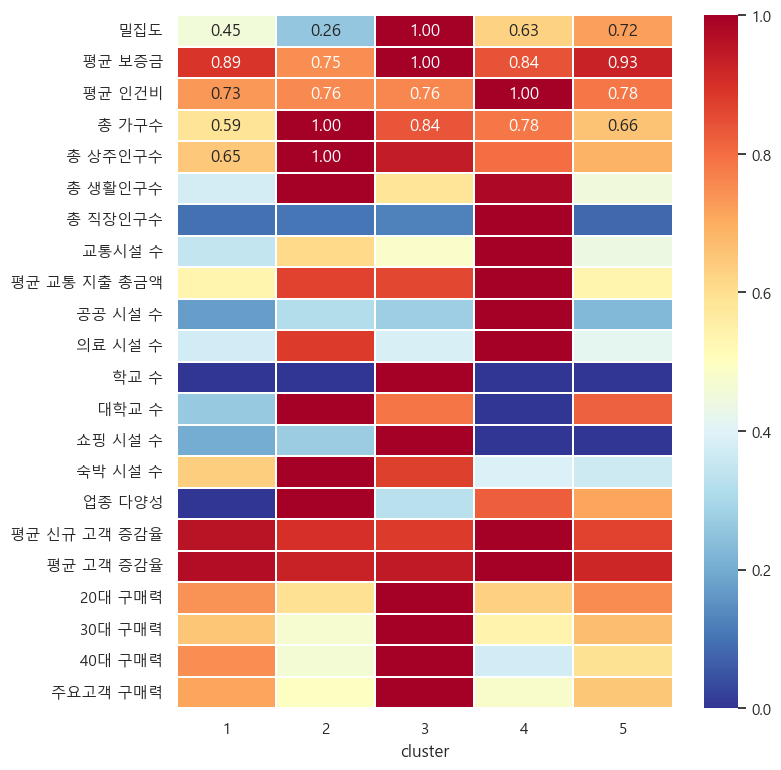

In [28]:
# 클러스터별 특징 파악
temp = data.groupby(['cluster']).mean(numeric_only=True)
cluster_mean = temp.transpose()
mean_table = cluster_mean.div(cluster_mean.max(axis=1), axis=0)

plt.figure(figsize=(8,9))
annot_kws = {'fontsize':12}
sns.heatmap(mean_table, annot=True, fmt='.2f',
           linewidths=0.1, annot_kws=annot_kws,
           cmap='RdYlBu_r')
plt.show()

In [29]:
mean_table

cluster,1,2,3,4,5
밀집도,0.454790,0.260524,1.000000,0.627989,0.722656
평균 보증금,0.890921,0.749812,1.000000,0.841681,0.928887
평균 인건비,0.733057,0.756576,0.758562,1.000000,0.782757
총 가구수,0.588821,1.000000,0.839242,0.782416,0.657692
총 상주인구수,0.647797,1.000000,0.939530,0.800055,0.691094
총 생활인구수,0.378581,1.000000,0.585858,0.982938,0.451043
총 직장인구수,0.097176,0.104288,0.124243,1.000000,0.080932
교통시설 수,0.345771,0.611488,0.484245,1.000000,0.441272
평균 교통 지출 총금액,0.531469,0.867314,0.860627,1.000000,0.531686
공공 시설 수,0.174277,0.313823,0.273973,1.000000,0.228708


<Axes: xlabel='평균 신규 고객 증감율', ylabel='cluster'>

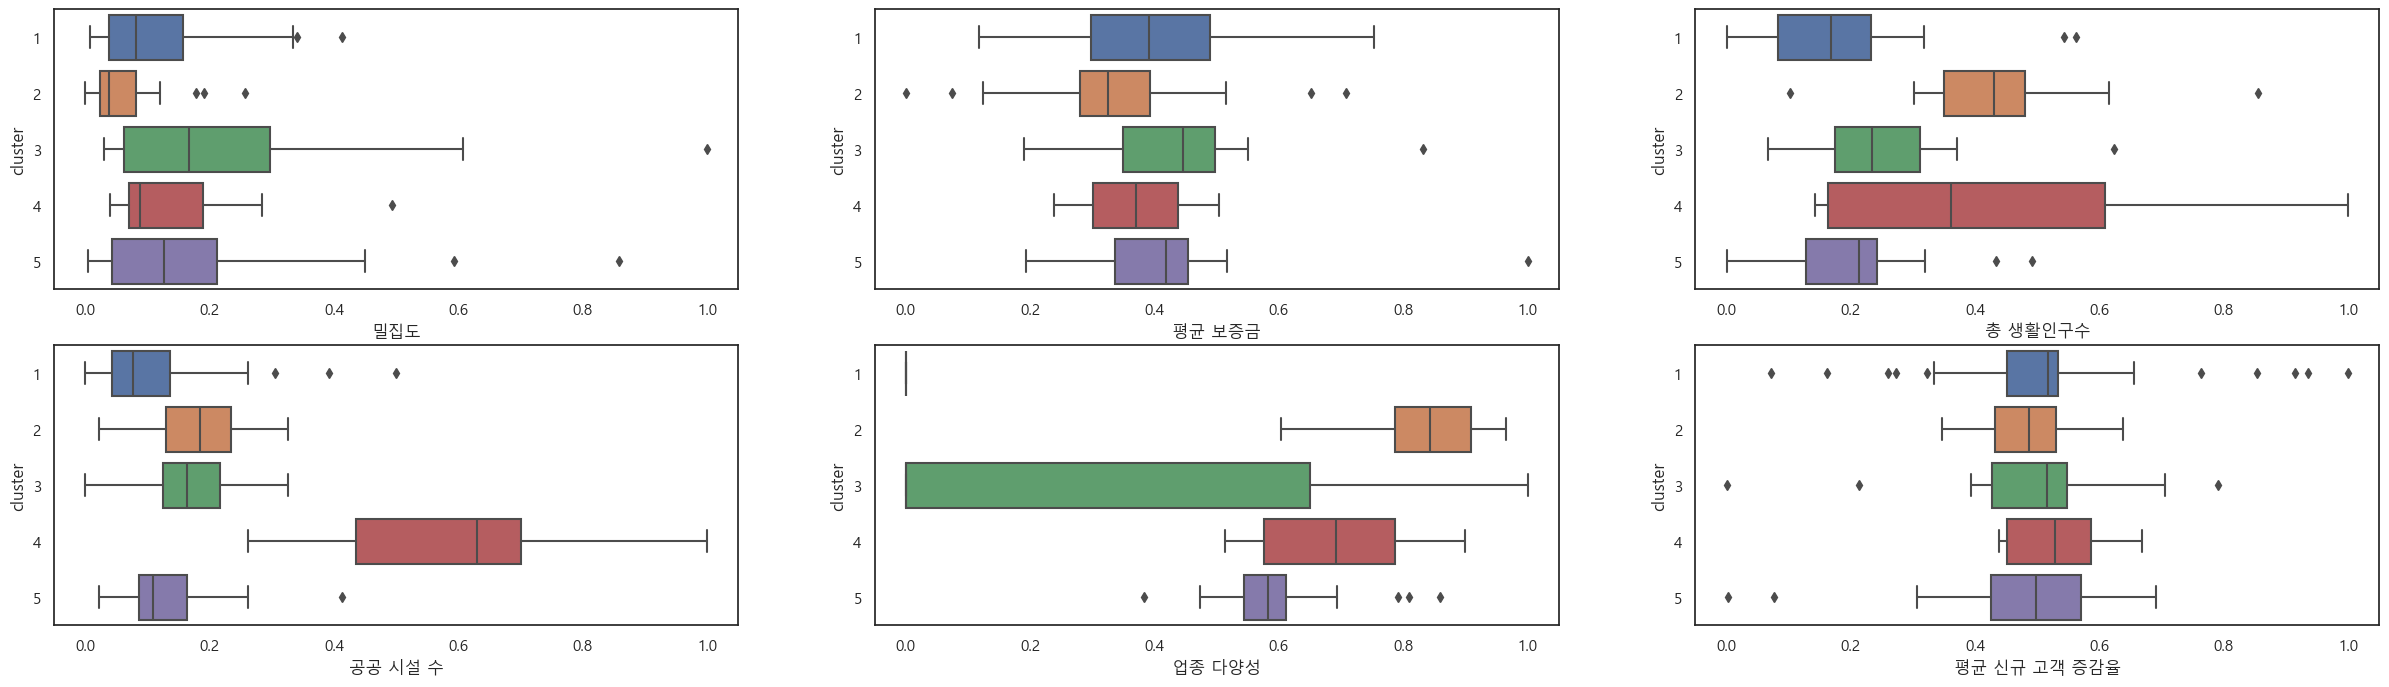

In [30]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30,8)

sns.boxplot(data=data, y='cluster', x='밀집도', orient='h', ax=ax1) # 밀집도
sns.boxplot(data=data, y='cluster', x='평균 보증금', orient='h', ax=ax2) # 임대료
sns.boxplot(data=data, y='cluster', x='총 생활인구수', orient='h', ax=ax3) # 인구
sns.boxplot(data=data, y='cluster', x='공공 시설 수', orient='h', ax=ax4) # 접근성
sns.boxplot(data=data, y='cluster', x='업종 다양성', orient='h', ax=ax5) 
sns.boxplot(data=data, y='cluster', x='평균 신규 고객 증감율', orient='h', ax=ax6) # 구매력

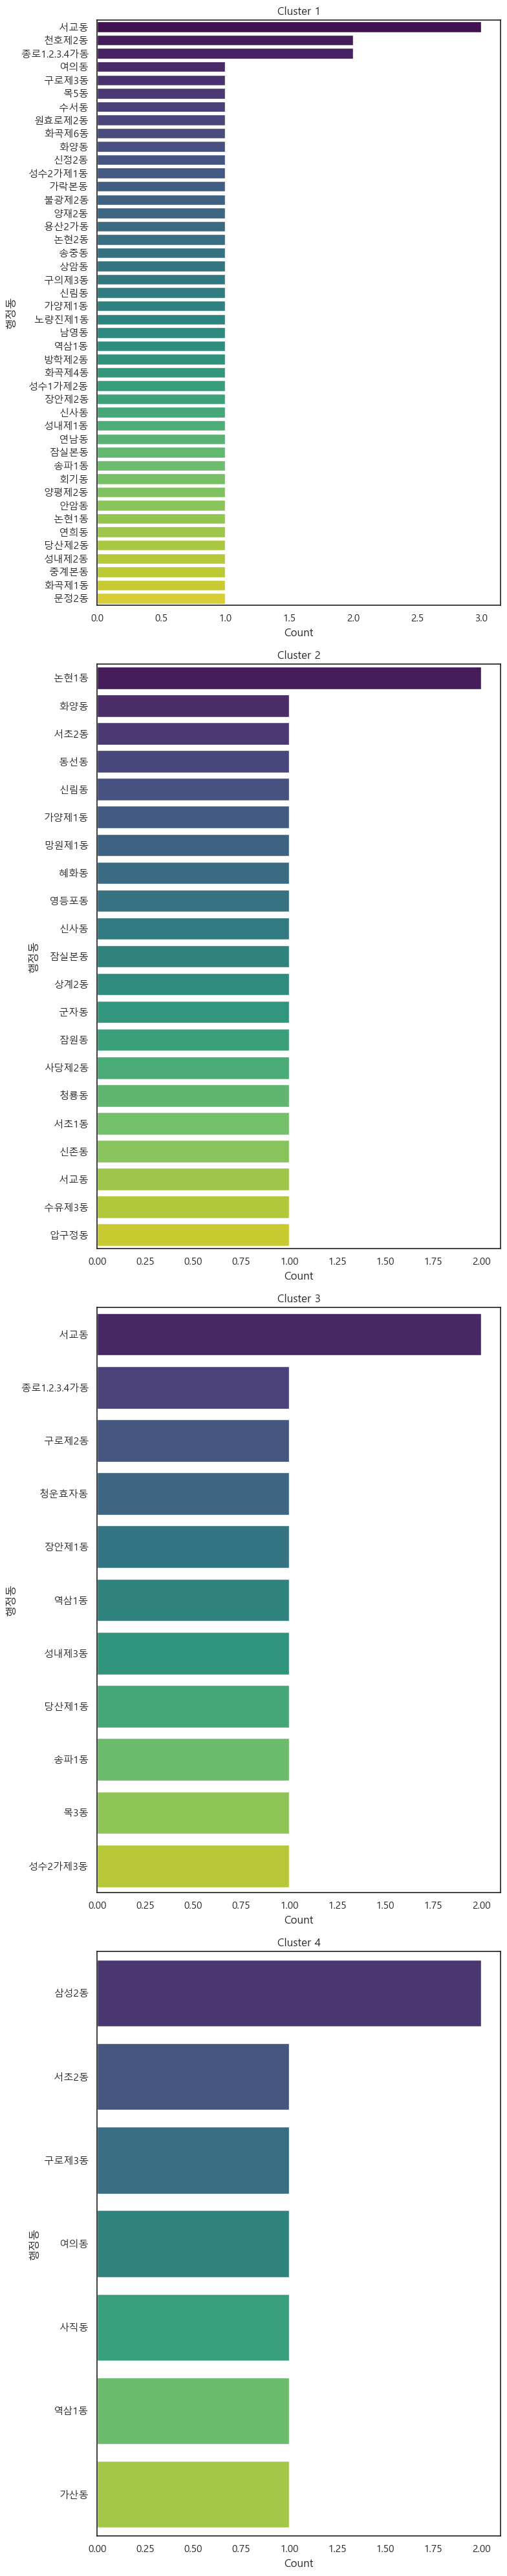

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 40))

for cluster_num in range(1, 5):
    ax = axes[cluster_num - 1] 
    
    cluster_data = data[data['cluster'] == cluster_num]
    
    sorted_data = cluster_data['행정동'].value_counts().reset_index().rename(columns={'index': '행정동', '행정동': 'Count'})
    sorted_data = sorted_data.sort_values(by='Count', ascending=False)
    
    sns.barplot(data=sorted_data, x='Count', y='행정동', ax=ax, palette='viridis')
    
    ax.set_title(f'Cluster {cluster_num}')
    ax.set_xlabel('Count')
    ax.set_ylabel('행정동')

plt.tight_layout()

plt.show()

In [32]:
data.to_csv('C:/Users/user/BigContest/상권_클러스터링.csv', index=False, encoding='utf-8')

### 6. ANOVA 분석

In [ ]:
data_stat = data
data_stat.head()

In [33]:
# "cluster" 컬럼의 데이터 타입을 문자열로 변경
data_stat = data.copy()
data_stat['cluster'] = data_stat['cluster'].astype(str)

In [34]:
# 등분산 검정: Levene's test
levene_results = {}
for column in adj_cols:
    homoscedasticity_result = pg.homoscedasticity(data_stat, dv=column, group='cluster')
    levene_results[column] = {'Levene Test p-value': homoscedasticity_result['pval'].values[0]}

print("등분산 검정 결과:")
for column, result in levene_results.items():
    print(f'{column}:')
    print(f'Levene Test p-value: {result["Levene Test p-value"]}')
    print('-' * 30)

등분산 검정 결과:
밀집도:
Levene Test p-value: 0.011345041139813297
------------------------------
평균 보증금:
Levene Test p-value: 0.7431769774715047
------------------------------
평균 인건비:
Levene Test p-value: 0.13617451705824193
------------------------------
총 생활인구수:
Levene Test p-value: 0.00021602469925501356
------------------------------
총 직장인구수:
Levene Test p-value: 0.1524519195035288
------------------------------
교통시설 수:
Levene Test p-value: 0.003888054295782255
------------------------------
공공 시설 수:
Levene Test p-value: 0.005079742971197164
------------------------------
의료 시설 수:
Levene Test p-value: 0.020479399786051535
------------------------------
학교 수:
Levene Test p-value: 2.2260285725287664e-16
------------------------------
대학교 수:
Levene Test p-value: 0.39677683536245245
------------------------------
쇼핑 시설 수:
Levene Test p-value: 0.23143205211723636
------------------------------
숙박 시설 수:
Levene Test p-value: 0.7672879987866174
------------------------------
업종 다양성:
Levene Test p-

In [35]:
# 정규성 검정: Shapiro-Wilk test
normality_results = {}
for column in adj_cols:
    shapiro_stat, shapiro_p = shapiro(data_stat[column])
    normality_results[column] = {'Shapiro-Wilk Statistic': shapiro_stat, 'p-value': shapiro_p}

print("정규성 검정 결과:")
for column, result in normality_results.items():
    print(f'{column}:')
    print(f'Shapiro-Wilk Statistic: {result["Shapiro-Wilk Statistic"]}')
    print(f'p-value: {result["p-value"]}')
    print('-' * 30)

정규성 검정 결과:
밀집도:
Shapiro-Wilk Statistic: 0.6999706029891968
p-value: 6.986770238965115e-14
------------------------------
평균 보증금:
Shapiro-Wilk Statistic: 0.9598256349563599
p-value: 0.0018277540802955627
------------------------------
평균 인건비:
Shapiro-Wilk Statistic: 0.8233660459518433
p-value: 2.591765968507076e-10
------------------------------
총 생활인구수:
Shapiro-Wilk Statistic: 0.9069662094116211
p-value: 8.68997233283153e-07
------------------------------
총 직장인구수:
Shapiro-Wilk Statistic: 0.6023715734481812
p-value: 5.054629408070635e-16
------------------------------
교통시설 수:
Shapiro-Wilk Statistic: 0.7132776975631714
p-value: 1.4903040552929209e-13
------------------------------
공공 시설 수:
Shapiro-Wilk Statistic: 0.775604248046875
p-value: 7.499323211035414e-12
------------------------------
의료 시설 수:
Shapiro-Wilk Statistic: 0.8575824499130249
p-value: 4.9449475625351624e-09
------------------------------
학교 수:
Shapiro-Wilk Statistic: 0.35413724184036255
p-value: 4.166192736586211e-20
---

In [36]:
anova_results = {}
for column in adj_cols:
    grouped_data = [data_stat[data_stat['cluster'] == cluster][column] for cluster in data_stat['cluster'].unique()]
    f_statistic, p_value = stats.f_oneway(*grouped_data)
    anova_results[column] = {'F-statistic': f_statistic, 'p-value': p_value}

# ANOVA 결과 출력
for column, result in anova_results.items():
    print(f'ANOVA 결과 - {column}:')
    print(f'F-statistic: {result["F-statistic"]}')
    print(f'p-value: {result["p-value"]}')
    print('-' * 30)

ANOVA 결과 - 밀집도:
F-statistic: 3.7826243604948933
p-value: 0.006426621380562332
------------------------------
ANOVA 결과 - 평균 보증금:
F-statistic: 1.3485769169143433
p-value: 0.25673377642460654
------------------------------
ANOVA 결과 - 평균 인건비:
F-statistic: 1.496171178852963
p-value: 0.20843145580068012
------------------------------
ANOVA 결과 - 총 생활인구수:
F-statistic: 17.255800113345902
p-value: 5.6854253052187467e-11
------------------------------
ANOVA 결과 - 총 직장인구수:
F-statistic: 86.5706230901291
p-value: 8.59412751280424e-33
------------------------------
ANOVA 결과 - 교통시설 수:
F-statistic: 6.874240005944086
p-value: 5.7327325659722816e-05
------------------------------
ANOVA 결과 - 공공 시설 수:
F-statistic: 35.62240226611594
p-value: 5.909333040557821e-19
------------------------------
ANOVA 결과 - 의료 시설 수:
F-statistic: 11.025330772294296
p-value: 1.5534655457250204e-07
------------------------------
ANOVA 결과 - 학교 수:
F-statistic: 4.0756579671926296e+16
p-value: 0.0
------------------------------
ANOVA 

### 7. 다중회귀분석

In [14]:
data = pd.read_excel('상권별 독립변수및경영위기지표.xlsx')
data.head()

,cluster,상권명,업종 다양성,밀집도,총 생활인구수,버스정거장 수,지하철역 수,관공서 수,은행 수,일반병원 수,종합병원 수,약국 수,유치원 수,경영위기지표
0,5,DMC(디지털미디어시티),0.312500,0.594427,355095,24.0,-3.540000e-08,3.0,9.0,-3.060000e-08,-3.530000e-08,10.0,-3.550000e-08,0.738259
1,1,가락시장역,0.000000,0.480066,1613064,3.0,-3.780000e-08,1.0,6.0,-3.480000e-08,-3.840000e-08,12.0,-3.400000e-08,23.223906
2,2,가로수길,0.786667,0.097369,2278365,3.0,-3.560000e-08,2.0,4.0,-3.900000e-08,-3.990000e-08,2.0,-3.160000e-08,12.585651
3,4,가산디지털단지,0.634146,0.319475,1126773,83.0,2.000000e+00,7.0,25.0,-3.610000e-08,-3.070000e-08,16.0,-3.490000e-08,4.387413
4,5,강남구청역,0.466667,0.215082,1656554,8.0,2.000000e+00,2.0,5.0,-3.270000e-08,-3.260000e-08,13.0,-3.350000e-08,8.015552


In [15]:
data['cluster'] = data['cluster'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cluster  113 non-null    object 
 1   상권명      113 non-null    object 
 2   업종 다양성   113 non-null    float64
 3   밀집도      113 non-null    float64
 4   총 생활인구수  113 non-null    int64  
 5   버스정거장 수  113 non-null    float64
 6   지하철역 수   113 non-null    float64
 7   관공서 수    113 non-null    float64
 8   은행 수     113 non-null    float64
 9   일반병원 수   113 non-null    float64
 10  종합병원 수   113 non-null    float64
 11  약국 수     113 non-null    float64
 12  유치원 수    113 non-null    float64
 13  경영위기지표   113 non-null    float64
dtypes: float64(11), int64(1), object(2)
memory usage: 12.5+ KB


In [16]:
x_data = data.drop(['cluster','상권명','경영위기지표'], axis=1)
target = data[['경영위기지표']]
x_data.head()

,업종 다양성,밀집도,총 생활인구수,버스정거장 수,지하철역 수,관공서 수,은행 수,일반병원 수,종합병원 수,약국 수,유치원 수
0,0.312500,0.594427,355095,24.0,-3.540000e-08,3.0,9.0,-3.060000e-08,-3.530000e-08,10.0,-3.550000e-08
1,0.000000,0.480066,1613064,3.0,-3.780000e-08,1.0,6.0,-3.480000e-08,-3.840000e-08,12.0,-3.400000e-08
2,0.786667,0.097369,2278365,3.0,-3.560000e-08,2.0,4.0,-3.900000e-08,-3.990000e-08,2.0,-3.160000e-08
3,0.634146,0.319475,1126773,83.0,2.000000e+00,7.0,25.0,-3.610000e-08,-3.070000e-08,16.0,-3.490000e-08
4,0.466667,0.215082,1656554,8.0,2.000000e+00,2.0,5.0,-3.270000e-08,-3.260000e-08,13.0,-3.350000e-08


In [17]:
x_data.columns

Index(['업종 다양성', '밀집도', '총 생활인구수', '버스정거장 수', '지하철역 수', '관공서 수', '은행 수',
       '일반병원 수', '종합병원 수', '약국 수', '유치원 수'],
      dtype='object')

In [18]:
target.head()

,경영위기지표
0,0.738259
1,23.223906
2,12.585651
3,4.387413
4,8.015552


In [19]:
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

vif_df = calculate_vif(x_data)
vif_df
# 1 < VIF < 5: 다중공선성 존재하지만 큰 문제는 X
# '약국수' 변수가 5 이상이므로 타 변수와의 상관성 확인 진행 

,Variable,VIF
0,업종 다양성,3.182416
1,밀집도,1.505789
2,총 생활인구수,5.015314
3,버스정거장 수,3.255158
4,지하철역 수,2.503938
5,관공서 수,3.047383
6,은행 수,3.766442
7,일반병원 수,1.688261
8,종합병원 수,1.130515
9,약국 수,5.911000


In [21]:
corr_mat = data.corr()
phar_corr = corr_mat['약국 수']
high_corr = phar_corr[phar_corr > 0.5]
high_corr

C:\Users\user\AppData\Local\Temp\ipykernel_24428\2560487444.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


총 생활인구수    0.541273
은행 수       0.610574
약국 수       1.000000
Name: 약국 수, dtype: float64

In [22]:
model = sm.OLS(target, x_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 경영위기지표   R-squared (uncentered):                   0.474
Model:                            OLS   Adj. R-squared (uncentered):              0.418
Method:                 Least Squares   F-statistic:                              8.364
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                    2.58e-10
Time:                        05:27:57   Log-Likelihood:                         -384.70
No. Observations:                 113   AIC:                                      791.4
Df Residuals:                     102   BIC:                                      821.4
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
업종 다양성        -1.9973      3.029     -0.659      0.511      -8.005       4.011
밀집도            1.8371      0.729      2.519      0.013       0.391       3.283
총 생활인구수     7.363e-07   7.61e-07      0.968      0.335   -7.72e-07    2.25e-06
버스정거장 수       -0.0596      0.089     -0.669      0.505      -0.236       0.117
지하철역 수         0.1911      0.912      0.210      0.834      -1.617       1.999
관공서 수          0.0672      0.483      0.139      0.890      -0.891       1.025
은행 수           0.1208      0.162      0.748      0.456      -0.200       0.441
일반병원 수        -0.8336      1.027     -0.811      0.419      -2.871       1.204
종합병원 수        -0.7054      3.327     -0.212      0.833      -7.305       5.894
약국 수           0.3763      0.139      2.698      0.008       0.100       0.653
유치원 수          0.6010      2.771      0.217      0.829      -4.896       6.098
==============================================================================
Omnibus:                       10.616   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               22.491
Skew:                          -0.259   Prob(JB):                     1.31e-05
Kurtosis:                       5.123   Cond. No.                     9.99e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 8. 클러스터별 경영위기 상권 식별

In [23]:
cluster_counts = data['cluster'].value_counts()
print(cluster_counts)

1    48
5    23
2    22
3    12
4     8
Name: cluster, dtype: int64


In [24]:
cluster_mean_values = data.groupby('cluster')['경영위기지표'].mean()
print(cluster_mean_values)

cluster
1    6.356999
2    6.613659
3    6.417323
4    8.613756
5    6.703505
Name: 경영위기지표, dtype: float64


In [25]:
# 'cluster'별로 '경영위기지표'의 평균값 계산
cluster_means = data.groupby('cluster')['경영위기지표'].mean()

# 각 클러스터의 평균값을 기준으로 상권을 분류하고 개수 세기
below_mean_counts = (data.groupby('cluster')['경영위기지표']
                     .apply(lambda x: (x <= cluster_means[x.name]).sum()))
above_mean_counts = (data.groupby('cluster')['경영위기지표']
                     .apply(lambda x: (x > cluster_means[x.name]).sum()))

# 결과 출력
for cluster, below_count, above_count in zip(cluster_means.index, below_mean_counts, above_mean_counts):
    print(f"Cluster {cluster}: Below Mean = {below_count}, Above Mean = {above_count}")
    
# 예측값
# cluster 1: 27, 2:11, 3:5, 4:5, 5:10

Cluster 1: Below Mean = 25, Above Mean = 23
Cluster 2: Below Mean = 13, Above Mean = 9
Cluster 3: Below Mean = 6, Above Mean = 6
Cluster 4: Below Mean = 3, Above Mean = 5
Cluster 5: Below Mean = 12, Above Mean = 11


In [26]:
x_ls = x_data.columns
y_ls = target.columns

In [27]:
# 모델의 위험상권 식별 에측 
cluster_results = {}

for cluster in data['cluster'].unique():
    risky_business_names = []
    cluster_subset = data[data['cluster'] == cluster]
    X_cluster = cluster_subset[x_ls]
    y_cluster = cluster_subset[y_ls]

    model = sm.OLS(y_cluster, X_cluster).fit()

    mean_actual = y_cluster.mean()
    predictions = model.predict(X_cluster)

    for prediction, business_name in zip(predictions, cluster_subset['상권명']):
        if prediction <= mean_actual.iloc[0]:
            risky_business_names.append(business_name)
    
    cluster_results[f'{cluster}'] = risky_business_names
    print(len(risky_business_names))
    print(risky_business_names, '\n')


10
['DMC(디지털미디어시티)', '구역삼세무서', '길동역', '마곡역(마곡)', '문정역', '사당역(사당)', '상수역(홍대)', '서원동상점가', '충무로역', '학동사거리'] 

27
['강동역 4번(강풀만화거리)', '경의선책거리', '경희대학교(경희대)', '노량진역(노량진)', '당산역', '로데오거리상점가', '목동사거리', '미아사거리역', '방학동도깨비시장', '상암동상점가', '서울역 12번', '선유도역 골목형상점가', '성수동카페거리', '신림역 5번(신림동주민센터, 신림동별빛거리)', '신정2동주민센터', '안암역 3번', '양천향교역 7번', '어린이대공원역', '언주역(차병원)', '연트럴파크(연남동주민센터)', '용산전자상가(용산역)', '인사동', '장안동사거리', '장지역(가든파이브)', '학동역', '해방촌 남동측', '홍대 걷고싶은 거리'] 

10
['건대입구역(건대)', '교대역(법원.검찰청)', '대학로(혜화역)', '망리단길', '성신여대', '수유역', '신논현역', '신림역(신림)', '신촌역(신촌역, 신촌로터리)', '홍대입구역(홍대)'] 

3
['가산디지털단지', '구로디지털단지', '선릉역'] 

5
['구로역', '둔촌역', '등촌역', '배화여자대학교(박노수미술관)', '장한평역(장한평)'] 



In [28]:
# 딕셔너리를 사용하여 '경영위기여부' 컬럼 생성
data['경영위기여부'] = 0  # 초기값으로 모든 행에 0 할당

for cluster, business_names in cluster_results.items():
    # cluster_results 딕셔너리의 값(리스트)에 포함된 상권명에 대해 1 할당
    data.loc[data['상권명'].isin(business_names), '경영위기여부'] = 1

In [29]:
data

,cluster,상권명,업종 다양성,밀집도,총 생활인구수,버스정거장 수,지하철역 수,관공서 수,은행 수,일반병원 수,종합병원 수,약국 수,유치원 수,경영위기지표,경영위기여부
0,5,DMC(디지털미디어시티),0.312500,0.594427,355095,2.400000e+01,-3.540000e-08,3.000000e+00,9.000000e+00,-3.060000e-08,-3.530000e-08,1.000000e+01,-3.550000e-08,0.738259,1
1,1,가락시장역,0.000000,0.480066,1613064,3.000000e+00,-3.780000e-08,1.000000e+00,6.000000e+00,-3.480000e-08,-3.840000e-08,1.200000e+01,-3.400000e-08,23.223906,0
2,2,가로수길,0.786667,0.097369,2278365,3.000000e+00,-3.560000e-08,2.000000e+00,4.000000e+00,-3.900000e-08,-3.990000e-08,2.000000e+00,-3.160000e-08,12.585651,0
3,4,가산디지털단지,0.634146,0.319475,1126773,8.300000e+01,2.000000e+00,7.000000e+00,2.500000e+01,-3.610000e-08,-3.070000e-08,1.600000e+01,-3.490000e-08,4.387413,1
4,5,강남구청역,0.466667,0.215082,1656554,8.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00,-3.270000e-08,-3.260000e-08,1.300000e+01,-3.350000e-08,8.015552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,1,해방촌 남동측,0.000000,0.728440,1489180,1.100000e+01,-3.340000e-08,3.000000e+00,-2.910000e-08,-3.290000e-08,-3.450000e-08,1.000000e+00,-3.490000e-08,12.383564,1
109,1,홍대 걷고싶은 거리,0.000000,0.189867,561671,2.000000e+00,-3.600000e-08,-2.930000e-08,-3.400000e-08,-3.650000e-08,-3.270000e-08,-3.580000e-08,-3.370000e-08,3.354836,1
110,1,홍대입구역 3번,0.000000,1.918869,850415,-2.360000e-08,-3.330000e-08,-3.140000e-08,-3.400000e-08,-3.310000e-08,-3.520000e-08,2.000000e+00,-3.460000e-08,2.930102,0
111,2,홍대입구역(홍대),0.717895,0.150866,3897068,1.800000e+01,4.000000e+00,3.000000e+00,6.000000e+00,-3.740000e-08,-3.520000e-08,9.000000e+00,-3.140000e-08,2.686214,1


In [53]:
#상권지수 테이블
market_stat = pd.read_csv('C:/Users/user/BigContest/상권지수테이블(군집분석용).csv')
data_final = pd.merge(data, market_stat, on='상권명', how='inner')
data_final

,cluster,상권명,업종 다양성_x,밀집도_x,총 생활인구수_x,버스정거장 수,지하철역 수,관공서 수,은행 수,일반병원 수,...,학교 수,대학교 수,쇼핑 시설 수,숙박 시설 수,업종 다양성_y,평균 신규 고객 증감율,평균 고객 증감율,20대 구매력,30대 구매력,40대 구매력
0,5,DMC(디지털미디어시티),0.312500,0.594427,355095,2.400000e+01,-3.540000e-08,3.000000e+00,9.000000e+00,-3.060000e-08,...,0.0,0.0,0.0,0.0,0.312500,-0.235000,-0.915000,27953.94784,49197.21483,62918.70065
1,1,가락시장역,0.000000,0.480066,1613064,3.000000e+00,-3.780000e-08,1.000000e+00,6.000000e+00,-3.480000e-08,...,0.0,0.0,0.0,0.0,0.000000,-0.055833,-0.035833,18319.44705,18044.48946,30799.74167
2,2,가로수길,0.786667,0.097369,2278365,3.000000e+00,-3.560000e-08,2.000000e+00,4.000000e+00,-3.900000e-08,...,0.0,0.0,0.0,0.0,0.786667,-0.035466,-0.035128,16198.05023,20325.69901,28292.72171
3,4,가산디지털단지,0.634146,0.319475,1126773,8.300000e+01,2.000000e+00,7.000000e+00,2.500000e+01,-3.610000e-08,...,0.0,0.0,0.0,3.0,0.634146,-0.218421,-0.310083,19865.10457,21670.93142,22460.11672
4,5,강남구청역,0.466667,0.215082,1656554,8.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00,-3.270000e-08,...,0.0,0.0,0.0,0.0,0.466667,0.095714,0.161071,12466.99913,14911.33086,17688.43993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,1,해방촌 남동측,0.000000,0.728440,1489180,1.100000e+01,-3.340000e-08,3.000000e+00,-2.910000e-08,-3.290000e-08,...,0.0,0.0,0.0,0.0,0.000000,-0.617857,-0.722946,21071.60061,26422.89482,41485.25991
109,1,홍대 걷고싶은 거리,0.000000,0.189867,561671,2.000000e+00,-3.600000e-08,-2.930000e-08,-3.400000e-08,-3.650000e-08,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,15841.74900,19509.08478,22108.58702
110,1,홍대입구역 3번,0.000000,1.918869,850415,-2.360000e-08,-3.330000e-08,-3.140000e-08,-3.400000e-08,-3.310000e-08,...,0.0,0.0,0.0,1.0,0.000000,-0.029167,-0.026310,29554.09203,58792.94162,106034.24390
111,2,홍대입구역(홍대),0.717895,0.150866,3897068,1.800000e+01,4.000000e+00,3.000000e+00,6.000000e+00,-3.740000e-08,...,0.0,0.0,0.0,0.0,0.717895,-0.237544,-0.331198,18789.27440,20886.97612,21765.43310


In [54]:
# _y 접미사가 붙은 컬럼 삭제
data_final = data_final.drop(data_final.filter(like='_y').columns, axis=1)

# _x 접미사 제거
data_final.columns = data_final.columns.str.replace('_x', '')


data_final.columns

Index(['cluster', '상권명', '업종 다양성', '밀집도', '총 생활인구수', '버스정거장 수', '지하철역 수',
       '관공서 수', '은행 수', '일반병원 수', '종합병원 수', '약국 수', '유치원 수', '초등학교 수',
       '경영위기지표', '경영위기여부', '자치구', '행정동', '평균 보증금', '평균 인건비', '총 가구수',
       '총 상주인구수', '총 직장인구수', '교통시설 수', '평균 교통 지출 총금액', '공공 시설 수', '의료 시설 수',
       '학교 수', '대학교 수', '쇼핑 시설 수', '숙박 시설 수', '평균 신규 고객 증감율', '평균 고객 증감율',
       '20대 구매력', '30대 구매력', '40대 구매력'],
      dtype='object')

In [61]:
def extract_lowest_risk_businesses(cluster_results, top_n=1):
    lowest_risk_businesses = {}

    for cluster, business_names in cluster_results.items():
        # '경영위기지표'를 기준으로 해당 클러스터의 상권을 정렬합니다.
        sorted_businesses = sorted(business_names, key=lambda x: data[data['상권명'] == x]['경영위기지표'].values[0])
        
        # 가장 낮은 '경영위기지표'를 가진 하위 3개의 상권을 선택합니다.
        lowest_risk_businesses[cluster] = sorted_businesses[:top_n]

    return lowest_risk_businesses

In [63]:
# 클러스터 결과를 함수에 전달하여 가장 낮은 위험의 상권을 추출합니다.
cluster_results = {
    'Cluster 1': ['강동구청역', '강동역 4번(강풀만화거리)', '강서구청', '경의선책거리', '경희대학교(경희대)', '노량진역(노량진)', '당산역', '로데오거리상점가', '미아사거리역', 
                  '방학동도깨비시장', '상암동상점가', '서울역 12번', '선유도역 골목형상점가', '성수동카페거리', '신정2동주민센터', '안암역 3번', '양천향교역 7번', '어린이대공원역', 
                  '언주역(차병원)', '연트럴파크(연남동주민센터)', '용산전자상가(용산역)', '인사동', '장안동사거리', '장지역(가든파이브)', '해방촌 남동측', '홍대 걷고싶은 거리', '홍대입구역 3번'],
    'Cluster 2': ['건대입구역(건대)', '교대역(법원.검찰청)', '노원역', '논현역', '대학로(혜화역)', '망리단길', '성신여대', '수유역', '신림역(신림)', '신촌역(신촌역, 신촌로터리)', '홍대입구역(홍대)'],
    'Cluster 3': ['구로역', '둔촌역', '등촌역', '배화여자대학교(박노수미술관)', '장한평역(장한평)'],
    'Cluster 4': ['가산디지털단지', '광화문역', '구로디지털단지', '선릉역', '역삼역'],
    'Cluster 5': ['DMC(디지털미디어시티)', '구역삼세무서', '길동역', '마곡역(마곡)', '문정역', '사당역(사당)', '상수역(홍대)', '서원동상점가', '충무로역', '학동사거리']
}

lowest_risk_businesses = extract_lowest_risk_businesses(cluster_results)

# 결과 출력
for cluster, businesses in lowest_risk_businesses.items():
    print(f"{cluster}에서 경영위기지표가 가장 낮은 상권:", businesses)


Cluster 1에서 경영위기지표가 가장 낮은 상권: ['언주역(차병원)']
Cluster 2에서 경영위기지표가 가장 낮은 상권: ['교대역(법원.검찰청)']
Cluster 3에서 경영위기지표가 가장 낮은 상권: ['둔촌역']
Cluster 4에서 경영위기지표가 가장 낮은 상권: ['구로디지털단지']
Cluster 5에서 경영위기지표가 가장 낮은 상권: ['학동사거리']


In [56]:
data_final.to_csv('상권분석최종.csv', index=False)